# Social Data Challenge #4 | Movilidad en Transporte Urbano PostCOVID

**Problema:** Aglomeraciónes dentro del proceso de movilidad en el transporte público en la ZMG aumenta la probabilidad de contraer o esparcir COVID-19.

**Hipótesis:** Bajo una reestructuración del plan de movilidad de transporte público urbano en la ZMG, dónde se re-ubiquen las paradas y rutas siguiendo una estrategía para evitar aglomeraciones, entonces se podrá disminuir la probabilidad de contrarer o esparcir COVID-19

**Objetivos:** Analizar datos del Transporte Urbano de la ZMG, para identificar areas de oportunidad en la administración de rutas y paradas con el fin de reducir aglomeraciones

**Metodologia**
- Recolectar datos relacionados al caso de estudio
- Analizar patrones en los datos que muestren posibles aglomeraciones
- Modelar dichas aglomeraciones y establecer un algoritmo para reducirlas
- Simular y validar el modelo mediante el # de nuevos contagios
- Implementar el modelo en un escenario real




#### Bases de datos

- **Datos Transporte Urbano Jalisco** https://datos.jalisco.gob.mx/dataset/rutas-nuevo-modelo-mitransporte-zmg-jalisco

- **Datos de personas hospitalizadas por COVID en Jalisco** https://datos.jalisco.gob.mx/dataset/personas-hospitalizadas-por-dia-por-covid-19-jalisco-de-julio-diciembre-2021

- **API Datos Jalisco** https://datos.jalisco.gob.mx/api/docs/936 *incompleta*

- **Moovit** https://moovit.com/ *API Pendiente*


# Consiguiendo datos de "Mi Transporte Jalisco"
Ref: https://www.jalisco.gob.mx/es/gobierno/comunicados/conoce-las-nuevas-rutas-de-mi-transporte

## Rutas de Transporte
Se pueden obtener **262** rutas

In [ ]:
import pandas as pd

# Data prefix path
pre_p = 'data/'

df_routes = pd.read_csv(f'{pre_p}routes.txt')
df_routes

route_id     agency_id route_short_name  \
0       mxb_A03_ROUTE      mxb_MT01              A03   
1       mxb_A05_ROUTE      mxb_MT01              A05   
2       mxb_A06_ROUTE      mxb_MT01              A06   
3       mxb_A07_ROUTE      mxb_MT01              A07   
4       mxb_A08_ROUTE      mxb_MT01              A08   
..                ...           ...              ...   
257  mxd_mxc_MT01_R42  mxd_mxc_MT01          T19-C04   
258  mxd_mxc_MT01_R43  mxd_mxc_MT01          T19-C06   
259  mxd_mxc_MT01_R44  mxd_mxc_MT01          T19-C07   
260  mxd_mxc_MT01_R45  mxd_mxc_MT01         T04A-C01   
261  mxd_mxc_MT01_R46  mxd_mxc_MT01              T06   

                                       route_long_name  route_type  \
0            Ruta Alimentadora Mi Macro Periferico A03           3   
1            Ruta Alimentadora Mi Macro Periferico A05           3   
2            Ruta Alimentadora Mi Macro Periferico A06           3   
3            Ruta Alimentadora Mi Macro Periferico A07           3   
4            Ruta Alimentadora Mi Macro Periferico A08           3   
..                                                 ...         ...   
257            Ruta Troncal T19-C04 - 78 "Solidaridad"           3   
258  Ruta Troncal T19-C06 - 619 "Azul Lomas de San ...           3   
259  Ruta Troncal T19-C07 - 619 "Roja Circuito Comp...           3   
260  Ruta Troncal "Troncal 04A-C01 - Lázaro Cárdena...           3   
261                 Ruta Troncal T06-37 "Pablo Valdez"           3   

    route_color route_text_color  route_url  
0        7FFF00           191919        NaN  
1        7FFF00           191919        NaN  
2        7FFF00           191919        NaN  
3        7FFF00           191919        NaN  
4        7FFF00           191919        NaN  
..          ...              ...        ...  
257      4C8D2B           FFFFFF        NaN  
258      4C8D2B           FFFFFF        NaN  
259      4C8D2B           FFFFFF        NaN  
260      4C8D2B           FFFFFF        NaN  
261      D40000           FFFFFF        NaN  

[262 rows x 8 columns]

## Nombre y ubicación de paradas

In [ ]:
df_stops = pd.read_csv(f'{pre_p}stops.txt')
df_stops

stop_id                            stop_name  \
0                mxb_A03_STOP_1              Terminal de la Ruta 110   
1               mxb_A03_STOP_10                  Juan Sánchez Azcona   
2               mxb_A03_STOP_11                J. José Justo Álvarez   
3               mxb_A03_STOP_12                J. José Justo Álvarez   
4               mxb_A03_STOP_13                  Avenida Experiencia   
...                         ...                                  ...   
9200  mxd_mxc_AMG_T19C07_STP_85                         Constitución   
9201  mxd_mxc_AMG_T19C07_STP_86                              Girasol   
9202  mxd_mxc_AMG_T19C07_STP_87                                 Rosa   
9203  mxd_mxc_AMG_T19C07_STP_89  Residencial San Sebastian El Grande   
9204  mxd_mxc_AMG_T19C07_STP_93                      Av. los Encinos   

      stop_desc  stop_lat   stop_lon  zone_id  location_type  parent_station  \
0           NaN  20.71663 -103.31998      NaN              0             NaN   
1           NaN  20.72257 -103.33623      NaN              0             NaN   
2           NaN  20.72272 -103.33761      NaN              0             NaN   
3           NaN  20.72268 -103.33889      NaN              0             NaN   
4           NaN  20.72133 -103.33968      NaN              0             NaN   
...         ...       ...        ...      ...            ...             ...   
9200        NaN  20.53001 -103.42414      NaN              0             NaN   
9201        NaN  20.52968 -103.42403      NaN              0             NaN   
9202        NaN  20.52804 -103.42420      NaN              0             NaN   
9203        NaN  20.52216 -103.42316      NaN              0             NaN   
9204        NaN  20.50982 -103.40181      NaN              0             NaN   

      wheelchair_boarding  platform_code  stop_code  
0                       0            NaN        NaN  
1                       0            NaN        NaN  
2                       0            NaN        NaN  
3                       0            NaN        NaN  
4                       0            NaN        NaN  
...                   ...            ...        ...  
9200                    0            NaN        NaN  
9201                    0            NaN        NaN  
9202                    0            NaN        NaN  
9203                    0            NaN        NaN  
9204                    0            NaN        NaN  

[9205 rows x 11 columns]

## Tiempos de cada ruta en recorrer cada parada

In [ ]:
df_stop_times = pd.read_csv(f'{pre_p}stop_times.txt')
df_stop_times

trip_id arrival_time departure_time  \
0                          mxb_A03_TRIP_1      4:49:00        4:49:00   
1                          mxb_A03_TRIP_1      4:50:14        4:50:14   
2                          mxb_A03_TRIP_1      4:51:14        4:51:14   
3                          mxb_A03_TRIP_1      4:52:03        4:52:03   
4                          mxb_A03_TRIP_1      4:53:09        4:53:09   
...                                   ...          ...            ...   
66707  mxd_mxc_MT01_R46_b-a_1111110_22680      7:22:49        7:22:49   
66708  mxd_mxc_MT01_R46_b-a_1111110_22680      7:23:45        7:23:45   
66709  mxd_mxc_MT01_R46_b-a_1111110_22680      7:24:52        7:24:52   
66710  mxd_mxc_MT01_R46_b-a_1111110_22680      7:26:24        7:26:24   
66711  mxd_mxc_MT01_R46_b-a_1111110_22680      7:27:52        7:27:52   

                  stop_id  stop_sequence stop_headsign  pickup_type  \
0          mxb_A03_STOP_1              0           NaN            0   
1          mxb_A03_STOP_2              1           NaN            0   
2          mxb_A03_STOP_3              2           NaN            0   
3          mxb_A03_STOP_4              3           NaN            0   
4          mxb_A03_STOP_5              4           NaN            0   
...                   ...            ...           ...          ...   
66707   mxd_mxc_859560030             63           NaN            0   
66708  mxd_mxc_1723257559             64           NaN            0   
66709  mxd_mxc_1554774675             65           NaN            0   
66710   mxd_mxc_919944283             66           NaN            0   
66711  mxd_mxc_1423117333             67           NaN            0   

       drop_off_type  shape_dist_traveled  timepoint  continuous_pickup  \
0                  0               0.0000        NaN                  0   
1                  0               0.3693        NaN                  0   
2                  0               0.6192        NaN                  0   
3                  0               0.7740        NaN                  0   
4                  0               1.0777        NaN                  0   
...              ...                  ...        ...                ...   
66707              0              16.9217        NaN                  0   
66708              0              17.1396        NaN                  0   
66709              0              17.4474        NaN                  0   
66710              0              17.9634        NaN                  0   
66711              0              18.4471        NaN                  0   

       continuous_drop_off  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
66707                    0  
66708                    0  
66709                    0  
66710                    0  
66711                    0  

[66712 rows x 12 columns]

## Formas de recorridos por lat/long por ruta

In [ ]:
df_shapes = pd.read_csv(f'{pre_p}shapes.txt')
df_shapes

shape_id  shape_pt_lat  shape_pt_lon  shape_pt_sequence  \
0          mxb_A03_ROUTE_1      20.71663    -103.31998                  0   
1          mxb_A03_ROUTE_1      20.71676    -103.32047                  1   
2          mxb_A03_ROUTE_1      20.71688    -103.32104                  2   
3          mxb_A03_ROUTE_1      20.71695    -103.32120                  3   
4          mxb_A03_ROUTE_1      20.71704    -103.32140                  4   
...                    ...           ...           ...                ...   
215198  mxd_mxc_MT01_R46_2      20.64662    -103.21012                269   
215199  mxd_mxc_MT01_R46_2      20.64590    -103.21017                270   
215200  mxd_mxc_MT01_R46_2      20.64565    -103.21016                271   
215201  mxd_mxc_MT01_R46_2      20.64575    -103.20993                272   
215202  mxd_mxc_MT01_R46_2      20.64585    -103.20973                273   

        shape_dist_traveled  
0                    0.0000  
1                    0.0536  
2                    0.1139  
3                    0.1323  
4                    0.1559  
...                     ...  
215198              18.2893  
215199              18.3695  
215200              18.3974  
215201              18.4236  
215202              18.4471  

[215203 rows x 5 columns]

## Analisis de paradas

In [ ]:
print('# de paradas registradas: ', len(df_stops))
print('# de paradas únicas: ', len(set(df_stops['stop_name'])))

# de paradas registradas:  9205
# de paradas únicas:  3280


Contar la frequencia de cada ruta y ordenarlo de forma DESC

In [ ]:
count_stops = df_stops['stop_name'].value_counts()
count_stops

Minerales                          58
Avenida Río Nilo                   55
Avenida Patria                     52
Avenida Adolfo López Mateos Sur    52
Avenida 8 de Julio                 46
                                   ..
Zapata                              1
Avenida de la Música                1
Boulevard Lomas del Mirador         1
Boulevard Del Vigía                 1
Mision San Miguel                   1
Name: stop_name, Length: 3280, dtype: int64

In [ ]:
# Take top 10 stop names
keys = count_stops.keys()
keys = keys[:10]

In [ ]:
# Take top 10 stop counts
freq_stops = count_stops.to_numpy()
freq_stops = freq_stops[:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

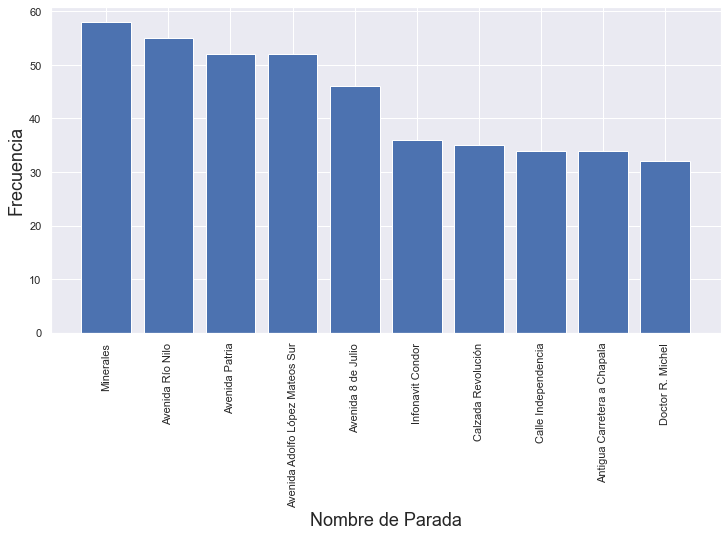

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

plt.figure(figsize=(12,6))
plt.bar(keys, freq_stops)
plt.ylabel('Frecuencia', fontsize=18)
plt.xlabel('Nombre de Parada', fontsize=18)
plt.xticks(rotation='vertical')


## Registro de hospitalizados por COVID-19 en Jalisco
Del día **21 de marzo del 2020** al día del **16 de agosto del 2021**

In [ ]:
df_covid = pd.read_csv('https://datos.jalisco.gob.mx/sites/default/files/16.08.2021_da_hospitalizados_covid19.csv')
df_covid

Fecha      Institución  \
0                                           21/03/2020              SSJ   
1                                           21/03/2020              HCG   
2                                           21/03/2020           ISSSTE   
3                                           21/03/2020             IMSS   
4                                           21/03/2020         Privados   
...                                                ...              ...   
3395                                        16/08/2021   SMM TLAJOMULCO   
3396                                        16/08/2021  SMM GUADALAJARA   
3397                                        16/08/2021        CRUZ ROJA   
3398                                        16/08/2021     SSMM ZAPOPAN   
3399  Información actualizada al 16 de agosto de 2021.              NaN   

     Pacientes Positivos En_estudio  
0           ND        ND         ND  
1            2         0          2  
2           ND        ND         ND  
3           ND        ND         ND  
4           ND        ND         ND  
...        ...       ...        ...  
3395         0         0          0  
3396         0         0          0  
3397         0         0          0  
3398         0         0          0  
3399       NaN       NaN        NaN  

[3400 rows x 5 columns]

### Recuento de registros

In [ ]:
import numpy as np

numeric_index = np.where(df_covid['Pacientes'].values != 'ND')
numeric_index = numeric_index[0][:-1]
numeric_data = df_covid.iloc[numeric_index]['Pacientes'].astype('int')
print("Total Pacientes: ", numeric_data.sum())

Total Pacientes:  332406


In [ ]:
numeric_index = np.where(df_covid['Positivos'].values != 'ND')
numeric_index = numeric_index[0][:-1]
numeric_data = df_covid.iloc[numeric_index]['Positivos'].astype('int')
print("Total Positivos: ", numeric_data.sum())

Total Positivos:  196599


In [ ]:
numeric_index = np.where(df_covid['En_estudio'].values != 'ND')
numeric_index = numeric_index[0][:-1]
numeric_data = df_covid.iloc[numeric_index]['En_estudio'].astype('int')
print("Total En_estudio: ", numeric_data.sum())

Total En_estudio:  135657


# Ideas de Solucion

Empezar por plotear el mapa ZMG y añadir las rutas, paradas y recorridos

**Mapa GeoJSON ZMG:** https://geo.jalisco.gob.mx/layers/geonode:zmg_municipios/metadata_detail

Ref: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

In [ ]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('https://geo.jalisco.gob.mx/geoserver/ows?srsName=EPSG%3A4326&outputFormat=json&service=WFS&srs=EPSG%3A4326&request=GetFeature&typename=geonode%3Azmg_municipios&version=1.0.0')
)

ModuleNotFoundError: No module named 'geopandas'